# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [134]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [135]:
# Set the API base URL
url_cities = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=Imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kermit
Processing Record 2 of Set 1 | morondava
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | price
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | vilyuchinsk
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | inhambane
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | ust-tsilma
Processing Record 20 of Set 1 | santa cruz
Processing Record 21 of Set 1 | iranshahr
Processing Record 2

Processing Record 38 of Set 4 | palu
Processing Record 39 of Set 4 | anapa
Processing Record 40 of Set 4 | saint-francois
Processing Record 41 of Set 4 | shanwei
Processing Record 42 of Set 4 | kaa-khem
Processing Record 43 of Set 4 | saint-leu
Processing Record 44 of Set 4 | pampa
Processing Record 45 of Set 4 | enewetak
Processing Record 46 of Set 4 | roma
Processing Record 47 of Set 4 | massawa
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | dhidhdhoo
Processing Record 0 of Set 5 | totness
Processing Record 1 of Set 5 | lamar
Processing Record 2 of Set 5 | tazacorte
Processing Record 3 of Set 5 | lazaro cardenas
Processing Record 4 of Set 5 | afua
Processing Record 5 of Set 5 | kuliyapitiya
Processing Record 6 of Set 5 | riachao do jacuipe
Processing Record 7 of Set 5 | alta
Processing Record 8 of Set 5 | antonio enes
Processing Record 9 of Set 5 | kristiansund
Processing Record 10 of Set 5 | kuusamo
Processing Record 11 of Set 5 | papao
Processing Record 12 o

Processing Record 32 of Set 8 | vadso
Processing Record 33 of Set 8 | taulaga
Processing Record 34 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 35 of Set 8 | sao felix do xingu
Processing Record 36 of Set 8 | jalingo
Processing Record 37 of Set 8 | maceio
Processing Record 38 of Set 8 | alo
Processing Record 39 of Set 8 | takamaka
City not found. Skipping...
Processing Record 40 of Set 8 | ashland
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | new norfolk
Processing Record 43 of Set 8 | grand-lahou
Processing Record 44 of Set 8 | flying fish cove
Processing Record 45 of Set 8 | karratha
Processing Record 46 of Set 8 | aioun
Processing Record 47 of Set 8 | yuzhno-kurilsk
Processing Record 48 of Set 8 | qarqaraly
Processing Record 49 of Set 8 | salinopolis
Processing Record 0 of Set 9 | aykhal
Processing Record 1 of Set 9 | sint michiel liber
Processing Record 2 of Set 9 | tyre
Processing Record 3 of Set 9 | kone
Processing Record 4 of Set 9

Processing Record 22 of Set 12 | mayahi
Processing Record 23 of Set 12 | wotje
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | conceicao da barra
Processing Record 26 of Set 12 | timbuktu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [137]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [138]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kermit,31.8576,-103.0927,94.05,19,21,9.33,US,1690167112
1,morondava,-20.2833,44.2833,66.00,74,0,6.53,MG,1690167112
2,thompson,55.7435,-97.8558,66.36,48,20,2.30,CA,1690167113
3,bilibino,68.0546,166.4372,61.39,66,100,2.57,RU,1690167113
4,wailua homesteads,22.0669,-159.3780,84.63,86,75,16.11,US,1690167114


In [139]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [140]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kermit,31.8576,-103.0927,94.05,19,21,9.33,US,1690167112
1,morondava,-20.2833,44.2833,66.00,74,0,6.53,MG,1690167112
2,thompson,55.7435,-97.8558,66.36,48,20,2.30,CA,1690167113
3,bilibino,68.0546,166.4372,61.39,66,100,2.57,RU,1690167113
4,wailua homesteads,22.0669,-159.3780,84.63,86,75,16.11,US,1690167114


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

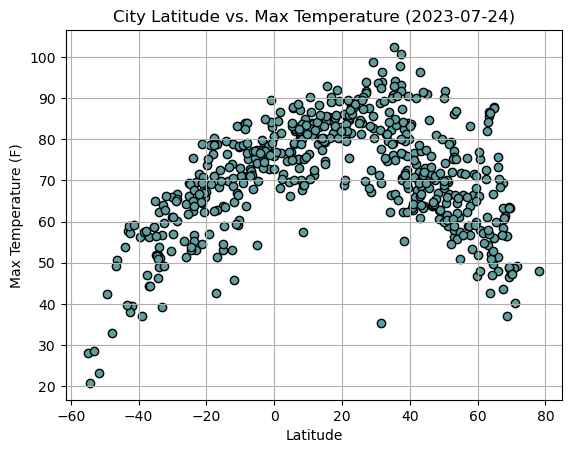

In [141]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="cadetblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

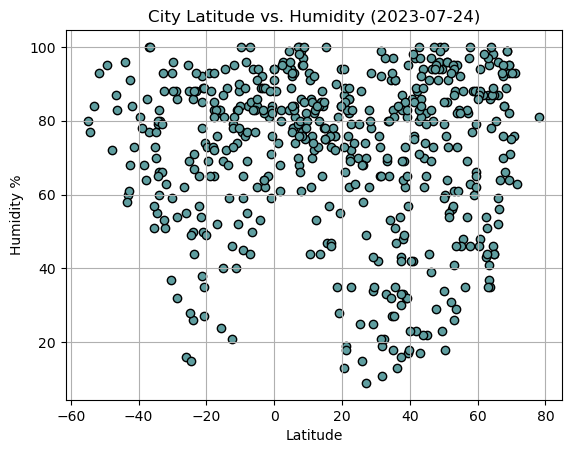

In [142]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="cadetblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

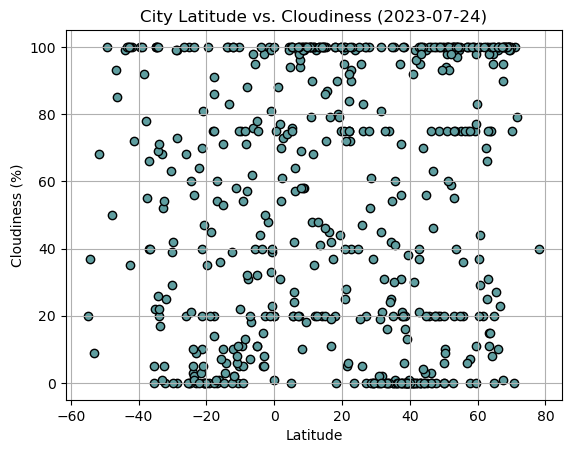

In [143]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], facecolor="cadetblue", edgecolor="Black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

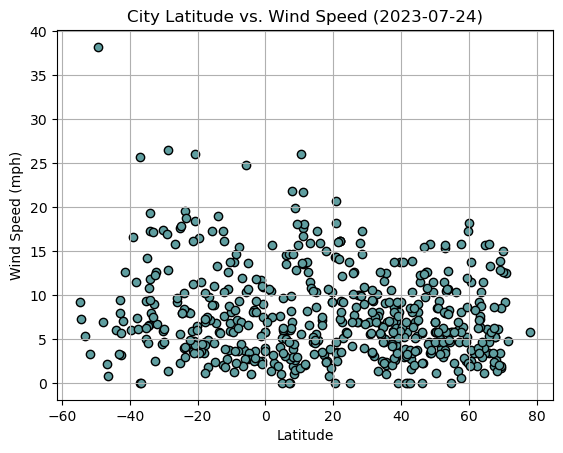

In [144]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], facecolor="cadetblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [145]:
# Define a function to create Linear Regression plots

def linear_reg(x,y):
    print("The R-value is: {}".format(round(st.pearsonr(x,y)[0],2)))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = {}x + {}".format(round(slope,2), round(intercept,2))
    plt.scatter(x, y, c="cadetblue", edgecolors="black")
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [146]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kermit,31.8576,-103.0927,94.05,19,21,9.33,US,1690167112
2,thompson,55.7435,-97.8558,66.36,48,20,2.30,CA,1690167113
3,bilibino,68.0546,166.4372,61.39,66,100,2.57,RU,1690167113
4,wailua homesteads,22.0669,-159.3780,84.63,86,75,16.11,US,1690167114
7,price,39.5994,-110.8107,90.66,17,0,13.80,US,1690167115


In [147]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,morondava,-20.2833,44.2833,66.00,74,0,6.53,MG,1690167112
5,port mathurin,-19.6833,63.4167,73.81,73,35,16.53,MU,1690167114
6,port-aux-francais,-49.3500,70.2167,42.48,95,100,38.23,TF,1690167115
8,adamstown,-25.0660,-130.1015,69.37,69,100,17.58,PN,1690167115
10,port elizabeth,-33.9180,25.5701,53.89,66,20,17.27,ZA,1690167115


###  Temperature vs. Latitude Linear Regression Plot

The R-value is: -0.57


Text(0, 0.5, 'Max Temp (F)')

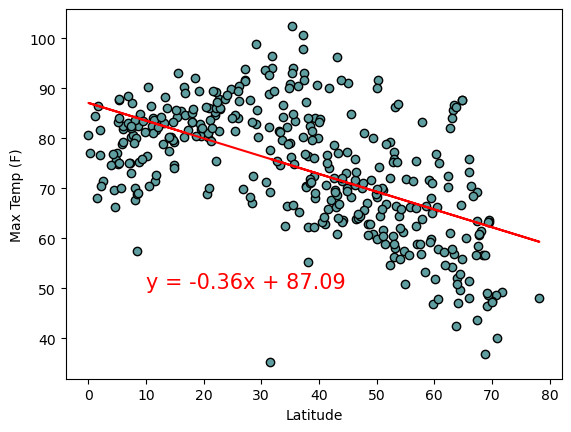

In [148]:
# Linear regression on Northern Hemisphere

equation = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 10, 50)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

The R-value is: 0.79


Text(0, 0.5, 'Max Temp (F)')

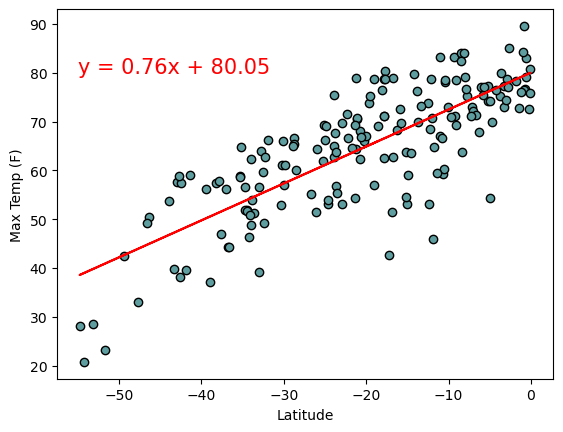

In [149]:
# Linear regression on Southern Hemisphere
equation = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -55, 80)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

**Discussion about the linear relationship:**
In the Northern hemisphere plot you can see a clear relation in higher temperatures closer to the equator and the temperatures lowering as you get further north. The temperatures in the Southern hemisphere seem to be higher than the Northern temperatures, though that could just be this particular data set. 

### Humidity vs. Latitude Linear Regression Plot

The R-value is: -0.05


Text(0, 0.5, 'Humidity (%)')

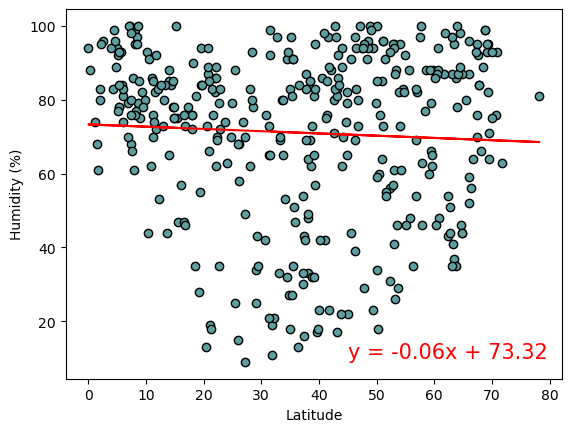

In [150]:
# Northern Hemisphere
equation = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 45, 10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The R-value is: 0.05


Text(0, 0.5, 'Humidity(%)')

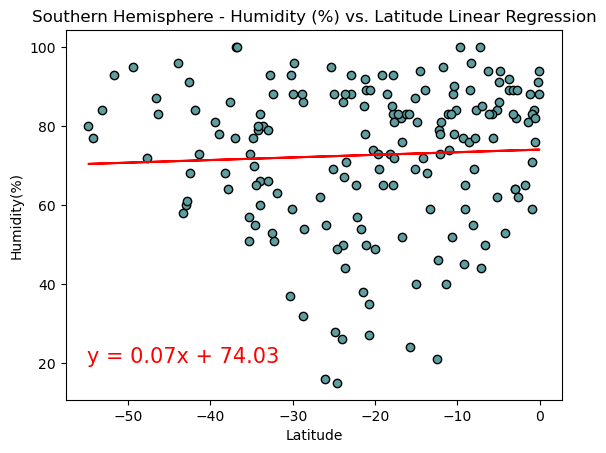

In [151]:
# Southern Hemisphere

equation = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -55, 20)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

**Discussion about the linear relationship:** 
In the Northern hemisphere it appears the humidity increases only slightly, almost so little as to not be notable. In the Southern hemisphere the humidity has a clearer change showing the humidity going down the closer to the equator it gets. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-value is: -0.01


Text(0, 0.5, 'Cloudiness (%)')

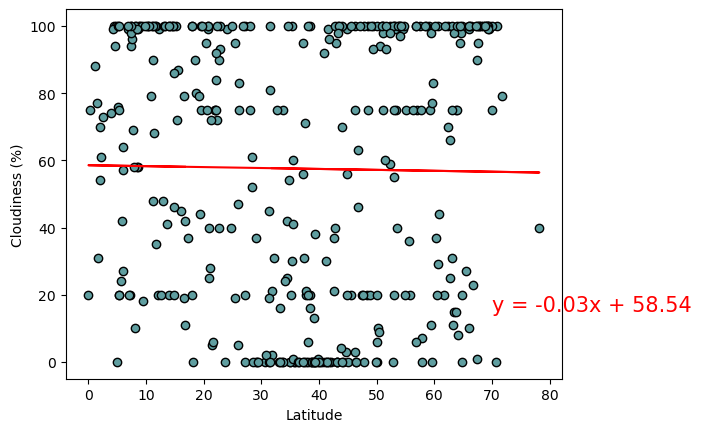

In [154]:
# Northern Hemisphere
equation = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 70, 15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The R-value is: -0.17


Text(0, 0.5, 'Cloudiness(%)')

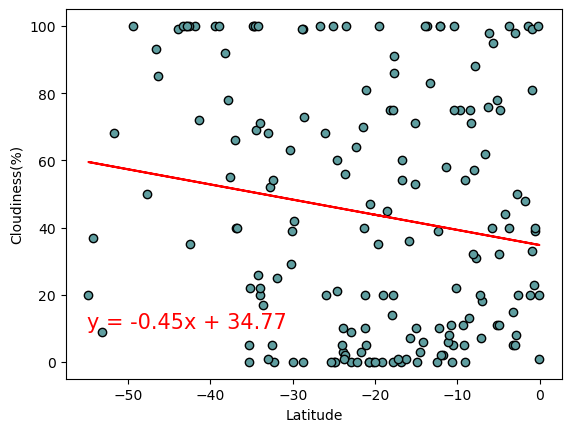

In [157]:
# Southern Hemisphere

equation = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -55, 10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

**Discussion about the linear relationship:** 
The Northern hemisphere has minimal change showing slightly more clouds as you get closer to the equator. The Southern hemisphere has a drastic drop in clouds as you get closer to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The R-value is: -0.13


Text(0, 0.5, 'Wind Speed')

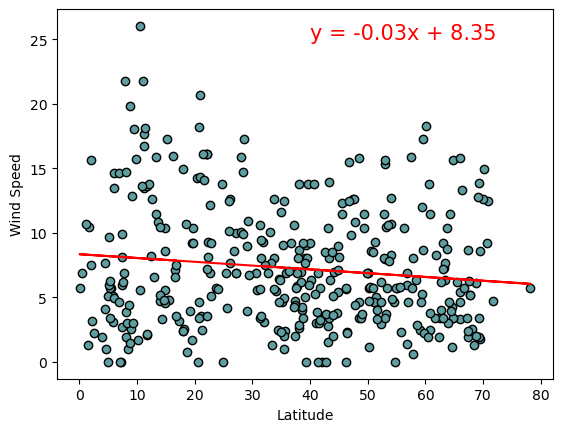

In [159]:
# Northern Hemisphere

equation = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 40, 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The R-value is: -0.13


Text(0, 0.5, 'Wind Speed')

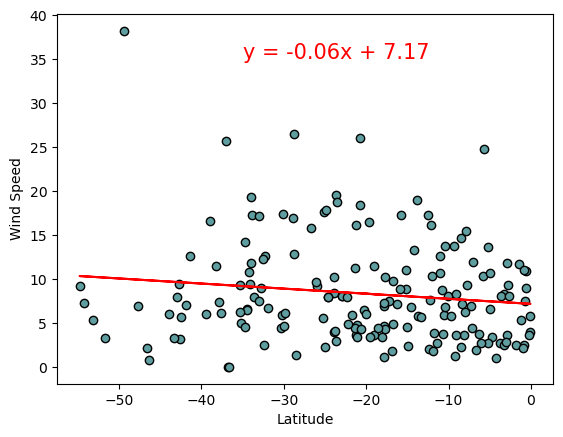

In [160]:
# Southern Hemisphere

equation = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation,-35, 35)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** 
In the Northern hemisphere the winds seem to double as they get closer to the equator and in the Southern hemisphere the winds are more constant going from around 8 to 10, showing less of a change as they get further from the equator. 